In [1]:
import pandas as pd
import torch
from torch.utils.data import DataLoader
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.datasets import ImageFolder
from torchvision import transforms
import torchvision.transforms as T
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

In [7]:
df_image_info = pd.read_csv('./test/_annotations.csv')
df_image_info.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,IMG_7079_MOV-23_jpg.rf.123a8de8c8da646e4a25f1c...,640,640,Rock,39,185,414,443
1,egohands-public-1623358709389_png_jpg.rf.01566...,640,640,Paper,131,40,277,234
2,Screen-Shot-2022-02-14-at-1-09-28-PM_png.rf.00...,640,640,Paper,0,73,156,483
3,Screen-Shot-2022-02-08-at-12-58-48-PM_png.rf.0...,640,640,Rock,45,335,148,548
4,egohands-public-1626966067167_png_jpg.rf.078d6...,640,640,Rock,142,316,318,501


In [8]:
print(df_image_info)

                                              filename  width  height  class  \
0    IMG_7079_MOV-23_jpg.rf.123a8de8c8da646e4a25f1c...    640     640   Rock   
1    egohands-public-1623358709389_png_jpg.rf.01566...    640     640  Paper   
2    Screen-Shot-2022-02-14-at-1-09-28-PM_png.rf.00...    640     640  Paper   
3    Screen-Shot-2022-02-08-at-12-58-48-PM_png.rf.0...    640     640   Rock   
4    egohands-public-1626966067167_png_jpg.rf.078d6...    640     640   Rock   
..                                                 ...    ...     ...    ...   
199  egohands-public-1623712844639_png_jpg.rf.f367a...    640     640  Paper   
200  egohands-public-1626386619095_png_jpg.rf.f19df...    640     640   Rock   
201  zoom_tests_RockPaperScissors-mohamed_mp4-157_j...    640     640  Paper   
202  egohands-public-1621214710295_png_jpg.rf.f776c...    640     640  Paper   
203  zoom_tests_RockPaperScissors-mohamed_mp4-137_j...    640     640  Paper   

     xmin  ymin  xmax  ymax  
0      39

In [27]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
df_image_info

,filename,width,height,class,xmin,ymin,xmax,ymax
0,IMG_7079_MOV-23_jpg.rf.123a8de8c8da646e4a25f1c...,640,640,Rock,39,185,414,443
1,egohands-public-1623358709389_png_jpg.rf.01566...,640,640,Paper,131,40,277,234
2,Screen-Shot-2022-02-14-at-1-09-28-PM_png.rf.00...,640,640,Paper,0,73,156,483
3,Screen-Shot-2022-02-08-at-12-58-48-PM_png.rf.0...,640,640,Rock,45,335,148,548
4,egohands-public-1626966067167_png_jpg.rf.078d6...,640,640,Rock,142,316,318,501
...,...,...,...,...,...,...,...,...
199,egohands-public-1623712844639_png_jpg.rf.f367a...,640,640,Paper,174,388,381,473
200,egohands-public-1626386619095_png_jpg.rf.f19df...,640,640,Rock,374,225,634,483
201,zoom_tests_RockPaperScissors-mohamed_mp4-157_j...,640,640,Paper,0,107,325,475
202,egohands-public-1621214710295_png_jpg.rf.f776c...,640,640,Paper,281,463,470,607


In [44]:
# List all available styles
print(plt.style.available)

# Use a popular built-in style like 'ggplot' instead
plt.style.use('_mpl-gallery')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


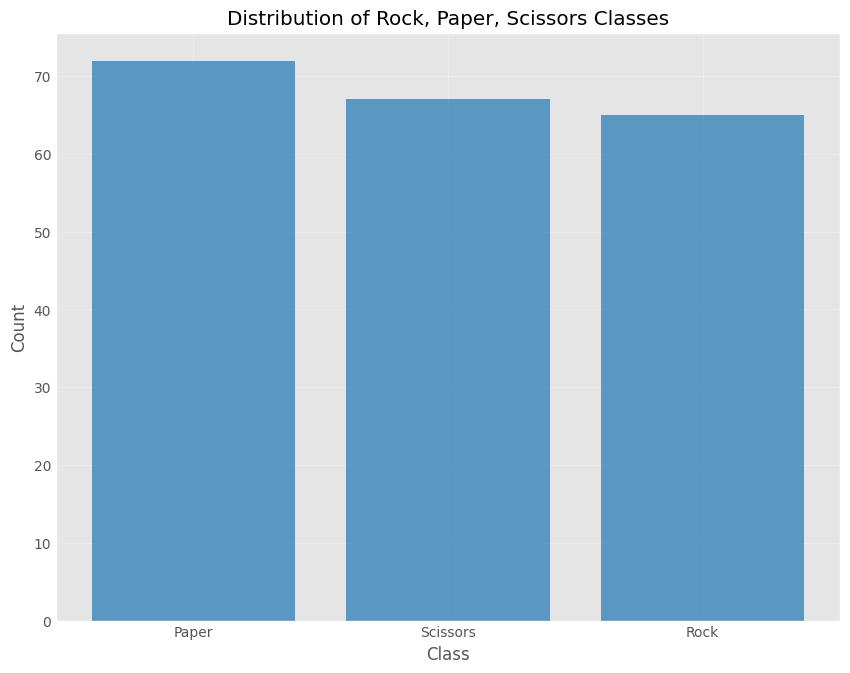

In [45]:
# Get the correct class counts
class_counts = df_image_info['class'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values, alpha=0.7)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Rock, Paper, Scissors Classes')
plt.grid(True, alpha=0.3)
plt.show()

In [46]:
df_image_info.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,IMG_7079_MOV-23_jpg.rf.123a8de8c8da646e4a25f1c...,640,640,Rock,39,185,414,443
1,egohands-public-1623358709389_png_jpg.rf.01566...,640,640,Paper,131,40,277,234
2,Screen-Shot-2022-02-14-at-1-09-28-PM_png.rf.00...,640,640,Paper,0,73,156,483
3,Screen-Shot-2022-02-08-at-12-58-48-PM_png.rf.0...,640,640,Rock,45,335,148,548
4,egohands-public-1626966067167_png_jpg.rf.078d6...,640,640,Rock,142,316,318,501


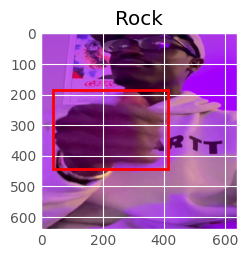

In [ ]:
import cv2
import os

current_path = os.getcwd()
image_path = f"./test/{df_image_info.loc[0, 'filename']}"
img = cv2.imread(image_path)

if img is not None:
	img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
else:
	print(f"Error: Could not load image from path: {image_path}")
	print(f"Current directory: {current_path}")
	# Check if file exists
	if os.path.exists(image_path):
		print("File exists but couldn't be read by cv2.imread()")
	else:
		print("File does not exist at the specified path")
		
x1, y1 = df_image_info.loc[0, 'xmin'], df_image_info.loc[0, 'ymin']
x2, y2 = df_image_info.loc[0, 'xmax'], df_image_info.loc[0, 'ymax']

plt.imshow(img)
plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='red', facecolor='none', linewidth=2))
plt.title(df_image_info.loc[0, 'class'])
plt.show()

80/10/10
treinamento/teste/validação

Lucas moreira 
ldias@lamce.coppe.ufrj.br